In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imshow_collection
from PIL import Image, ImageFilter
import PIL.ImageOps  
import cv2
import os
from os import listdir
from os import chdir
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import glob 
import imutils
import skimage
from skimage import data
from skimage import filters
from skimage.segmentation import slic, mark_boundaries
from skimage.color import rgb2gray
from skimage import io 
from skimage import util
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import *
from pylab import *
import pathlib
import pytesseract
import traceback
import csv
from collections import Counter
from spellchecker import SpellChecker
import random
import string
import re
from tqdm import tqdm
import pickle
%matplotlib inline

# Preprocessing

In [37]:
def GrayImage(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
def thresh_bin(image):
    thresh = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY_INV)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    result = 255 - opening
    return result

def remove_noise(image):
    return cv2.cvtColor(cv2.medianBlur(image,5), cv2.COLOR_BGR2RGB)

def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
def CropImage(image,x,y,h,w):
    new_image = image[y:y+h, x:x+w]
    return new_image
def dilatation(image):
    kernel = np.ones((5,25), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

In [38]:
def preprocessing(image): 
    scale_percent = 100 # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    image_colred = cv2.cvtColor(cv2.resize(image,dim), cv2.COLOR_BGR2GRAY)
    image_filtred1 = cv2.bilateralFilter(image_colred, 5, 75, 75)
    image_threshed = cv2.adaptiveThreshold(image_filtred1, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 221, 12)
    image_blured = cv2.medianBlur(image_threshed, 3)#3 - 5 is the best value so far because the 7 make the 'c' of lalch (2nd word not clear)
    image_bordered = cv2.copyMakeBorder(image_blured, 3, 5, 5, 5,cv2.BORDER_CONSTANT,value=[0, 0, 0])
    return image_bordered

In [39]:
def Houg_lines(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,30,10,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/180,50)
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1600*(-b))
        y1 = int(y0 + 1600*(a))
        x2 = int(x0 - 1600*(-b))
        y2 = int(y0 - 1600*(a))

        cv2.line(img,(x1,y1),(x2,y2),(231, 240, 216),10)
    return img

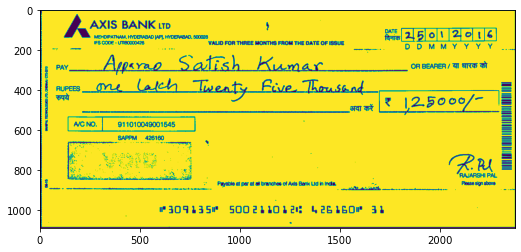

In [40]:
image=cv2.imread('C:/Users/admin/Cheque5.tif')
img=preprocessing(image)

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
plt.imshow(img)

***Legal Amount Extraction :***

['J\nPRAXIS', 'BANK', 'ur\n:', 'MEHDIPATNAM,', 'HYDERABAD', '[AP],', 'HYDERABAD,', '500028\n\nUTIBO000426', 'VALID', 'FOR', 'THREE', 'MONTHS', 'FROM', 'THE', 'DATE', 'OF', 'ISSUE\n\nMANIPAL', 'TECHNOLOGIES', 'LTD.,', 'CHENNAI', '/', 'CTS-2010\n\n08-15\n\nIFS', 'CODE', '-\n\nPAY', 'A', 'UL\n\nA/C', 'NO.', '|\n\n911010049001545\n\nSAPPM', '426160\n\na', 'moh', 'ae', '(ated', ':', 'clwenty', 'Five.', 'Thousind\n\nPayable', 'at', 'par', 'at', 'all', 'branches', 'of', 'Axis', 'Bank', 'Ltd', 'in', 'India.\n\nm3090835', '5"\n\n500', 'cbbOdcn\n\n47262600"\n\nDATE\n\nAaem|', '24', '5|', '0\nD2', '1B)', '201M\n\neee', 'ars\na', 'yoy\n\naynn', 'Salish', 'Kumar.', '__', 'on', 'aearcny', 'a', 'one', 'at\n\n4\n\nRPL\n\nRAJARSHI', 'PAL\nPlease', 'sign', 'above\n\nQUAN', 'AA\n']


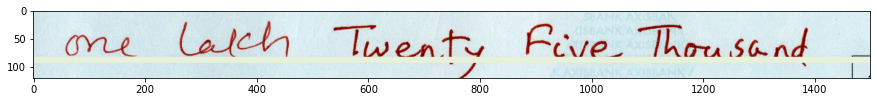

In [41]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\admin\AppData\Local\Tesseract-OCR\tesseract.exe'
#image=cv2.imread('C:/Users/admin/Cheque5.tif')
extract = pytesseract.image_to_string(image)
extract = ''.join(extract)
extract = extract.split(' ')
l = list()
for i in extract:
    if i != '' and i != ' ':
         l.append(i)
print(l)
for i in l:
    if re.search("^axi.*", i.lower()):
        legal = image[320:440, 220:1720]
        img_threshed1=thresh_bin(legal)
        line_deleted1 = Houg_lines(legal)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/legalamt.png', line_deleted1)
    elif re.search("^syn.*", i.lower()) or re.search("^dicat.*", i.lower()):
        legal = image[310:440, 350:1830]
        img_threshed1=thresh_bin(legal)
        line_deleted1 = Houg_lines(legal)
        line_deleted2 = Houg_lines(courtesy)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/legalamt.png', line_deleted1)
    elif re.search("^icic.*", i.lower()):
        legal = image[310:430, 450:2250]
        img_threshed1=thresh_bin(legal)
        line_deleted1 = Houg_lines(legal)
        line_deleted2 = Houg_lines(courtesy)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/legalamt.png', line_deleted1)
    elif re.search("^cana.*", i.lower()):
        legal = image[320:440, 350:1850]
        img_threshed1=thresh_bin(legal)
        line_deleted1 = Houg_lines(legal)
        line_deleted2 = Houg_lines(courtesy)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/legalamt.png', line_deleted1)


i, (im1) = plt.subplots(1)
i.set_figwidth(15)
plt.imshow(legal)

***Courtesy Amount Extraction :***

['MANIPAL', 'TECHNOLOGIES', 'LTD.,', 'CHENNAI', '/', 'CTS-2010\n\n08-15\n\nAXIS', 'BANK', 'tp\n\nMEHDIPATNAM,', 'HYDERABAD', '[AP],', 'HYDERABAD,', '500028\nIFS', 'CODE', '-', 'UTIB0000426', 'VALID', 'FOR', 'THREE', 'MONTHS', 'FROM', 'THE', 'DATE', 'OF', 'ISSUE\n\nat', 'A\\\n\nnuPeee.', 'OY', 'LE', 'Latch\nwry\n\nlp\n\nACNO.', '|\n\n911010049001545\n\nSAPPM', '426160\n\nBier', 'he', 'ot', 'Feve_', 'ap', 'biioves', 'SO.', 'Ah\n—y', '.\n\nSal', 'oR\n\nPayable', 'at', 'par', 'at', 'all', 'branches', 'of', 'Axis', 'Bank', 'Ltd', 'in', 'India.\n\nm3090835', '5"\n\n500', 'cbbOdcn\n\n47262600"\n\nDATE\n\nAaem|', '24', '5|', '0\nD2', '1B)', '201M\n\neee', 'ars\na', 'yoy\n\naynn', 'Salish', 'Kumar.', '__', 'on', 'aearcny', 'a', 'one', 'at\n\nz\n\n4\n\n\\Qgeou', '|\n\ncorey:', 'an', 'ylawnsnommnrvnnennnnnnvenhennnnsrennsn\n\nRPL\n\nRAJARSHI', 'PAL\nPlease', 'sign', 'above\n\nQUAN', 'AA\n']


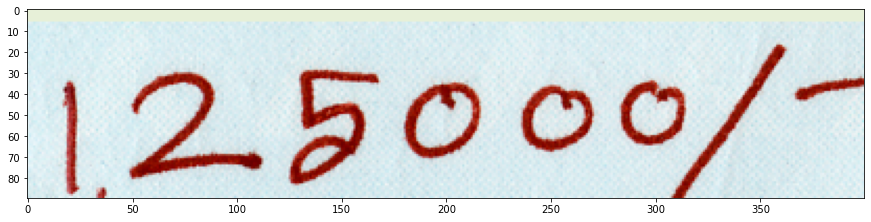

In [42]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\admin\AppData\Local\Tesseract-OCR\tesseract.exe'
#image=cv2.imread('C:/Users/admin/Cheque5.tif')
extract = pytesseract.image_to_string(image)
extract = ''.join(extract)
extract = extract.split(' ')
l = list()
for i in extract:
    if i != '' and i != ' ':
         l.append(i)
print(l)
for i in l:
    if re.search("^axi.*", i.lower()):
        courtesy = image[400:490, 1800:2200]
        line_deleted2 = Houg_lines(courtesy)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/courtesyamt.png', line_deleted2)
    elif re.search("^syn.*", i.lower()) or re.search("^dicat.*", i.lower()):
        courtesy = image[400:550, 1650:2085]
        line_deleted2 = Houg_lines(courtesy)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/courtesyamt.png', line_deleted2)
    elif re.search("^icic.*", i.lower()):
        courtesy = image[400:500, 1860:2300]
        line_deleted2 = Houg_lines(courtesy)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/courtesyamt.png', line_deleted2)
    elif re.search("^cana.*", i.lower()):
        courtesy = image[440:540, 1840:2280]
        line_deleted2 = Houg_lines(courtesy)
        cv2.imwrite('C:/Users/admin/SimpleHTR/static/courtesyamt.png', line_deleted2)

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
plt.imshow(courtesy)

# Segmentation 

In [43]:
def legal_amount_segmentation(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#binary
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
#dilation
    kernel = np.ones((5,25), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
#find contours
    ctrs, hier = cv2.findContours(img_erosion.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#sort contours
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for i, ctr in enumerate(sorted_ctrs):
# Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        if 30 < h < 5585 and 2 < w < 5585:
# Getting ROI
            roi = image[y:y+h, x:x+w]
            cv2.imwrite('C:/Users/admin/SimpleHTR/words/Word'+str(i)+'.png', roi)
    # show ROI
    #plt.imshow('segment no:'+str(i),roi)
            cv2.rectangle(image,(x,y),( x + w, y + h ),(0,0,0),2)
    
    return plt.imshow(image)

In [44]:
def courtesy_amount_segmentation(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#binary
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
#dilation
    kernel = np.ones((3,3), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=3)
#find contours
    ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#sort contours
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for i, ctr in enumerate(sorted_ctrs, start=1):
# Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        if 30 < h < 70 and 2 < w < 185:
# Getting ROI
            roi = image[y:y+h, x:x+w]
            cv2.imwrite('C:/Users/admin/SimpleHTR/numbers/Number'+str(i)+'.png', roi)
    # show ROI
    #plt.imshow('segment no:'+str(i),roi)
            cv2.rectangle(image,(x,y),( x + w, y + h ),(0,0,0),2)
    
    return plt.imshow(image)

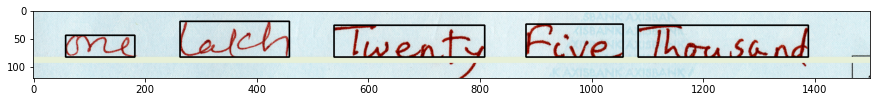

In [45]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)

legal_amount_segmentation(legal)


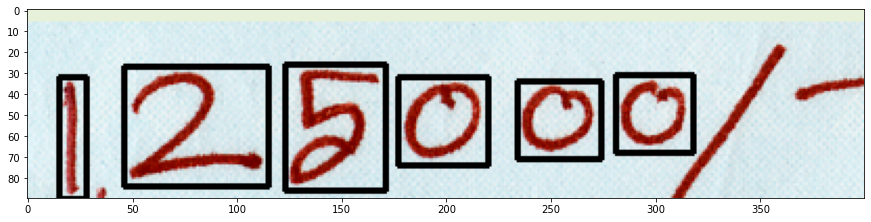

In [46]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)

courtesy_amount_segmentation(courtesy)

# Prediction 

***Courtesy Amount Prediction***

In [47]:
def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))
        #newImage.save('C:/Users/admin/sample.png')

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return newImage

In [48]:
new_model = tf.keras.models.load_model('C:/Users/admin/digits_recognition.h5')

In [49]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1452)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1452)              5808      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               185984    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [50]:
x=imageprepare('C:/Users/admin/Number3.png')

8


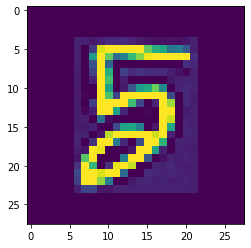

In [51]:
nb= plt.imread('C:/Users/admin/sample.png')
#nb=edges2
#kernel = np.ones((5,5),np.uint8)
#nb = cv2.erode(nb,kernel, iterations=1)
 

nb = util.invert(nb)

nb = cv2.resize(nb, (28, 28))
imshow(nb)
#nb = img_to_array(nb)
nb = nb.reshape(1, 28, 28, 1)
nb = nb.astype('float32')
#nb = nb / 255.0
#nb=tf.keras.utils.normalize(nb, axis=1)
pred = new_model.predict(nb)
print(pred.argmax())

In [52]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
def load_image(file):
    # load the image
    imageprepare(file)
    img = load_img(file, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1,28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [54]:
from skimage import util 
y=""
montant_chiffre=[]
dict_montant={}
for file in os.listdir('C:/Users/admin/SimpleHTR/numbers'):
    nb = load_image(file)
    pred = new_model.predict(nb)
    pred_idx = np.argmax(pred)
    montant_chiffre.append(pred_idx)
    dict_montant[pred_idx]='1'
    y=y + str(pred.argmax())

for i in range(len(montant_chiffre)):
    montant_chiffre[i]=str(montant_chiffre[i])
m=''.join(montant_chiffre)

Montant_chiffres = m
print(m)

492399


***Legal Amount Prediction***

In [55]:
chdir('C:/Users/admin/SimpleHTR/src')

In [56]:
import argparse
import json
from typing import Tuple, List

import csv
import cv2
import editdistance
from path import Path

from dataloader_iam import DataLoaderIAM, Batch
from model import Model, DecoderType
from preprocessor import Preprocessor

In [57]:
class FilePaths:
    """Filenames and paths to data."""
    fn_char_list = 'C:/Users/admin/SimpleHTR/model/charList.txt'
    fn_summary = 'C:/Users/admin/SimpleHTR/model/summary.json'
    fn_corpus = 'C:/Users/admin/SimpleHTR/data/corpus.txt'


In [58]:
def get_img_height() -> int:
    """Fixed height for NN."""
    return 32


In [59]:
def get_img_size(line_mode: bool = False) -> Tuple[int, int]:
    """Height is fixed for NN, width is set according to training mode (single words or text lines)."""
    if line_mode:
        return 256, get_img_height()
    return 128, get_img_height()

In [60]:
def char_list_from_file() -> List[str]:
    with open(FilePaths.fn_char_list) as f:
        return list(f.read())

In [61]:
def SpellingMistakeCorrection(initial_data:dict):
    all_data = {}
    list_of_words = ["one","two","three","four","five","six","seven","eight","nine","ten","eleven","twelve","thirteen","fourteen","fifteen","sixteen","seventeen","eighteen","nineteen","twenty","thirty","forty","fifty","sixty","seventy","eighty","ninety","hundred","thousand","million","lakh","lakhs"]
    list_of_special_car = ['*', ',', '.', '/', '#', '+', '-', ';', ':', '?', '!', '%', '^', '~', '{', '}', '[', ']', '(',')', '_', '@']
    spell = SpellChecker(language=None)
    spell.word_frequency.load_text_file(r'C:/Users/admin/SimpleHTR/data/my_text_file.txt')
    data = []
    probs = []
    for i, j in initial_data.items():
        if '0' not in i and '1' not in i and '2' not in i and '3' not in i and '4' not in i and '5' not in i and '6' not in i and '7' not in i and '8' not in i and '9' not in i:
            all_data[i] = j
    for i in range(len(list_of_special_car)):
        if list_of_special_car[i] in all_data:
            del all_data[list_of_special_car[i]]
    for i, j in all_data.items():
        data.append(i)
        probs.append(j)

    data = [x.lower() for x in data]

    for a in range(len(data)):
        data[a]=spell.correction(data[a])

    for i in range(len(data)):
        list_ratios=[]
        if data[i] not in list_of_words:
            string_incorr = data[i]
            for j in list_of_words:
                string = j
                emp = difflib.SequenceMatcher(None,string_incorr,string)
                list_ratios.append(emp.ratio())
                max_value = max(list_ratios)
                index = list_ratios.index(max_value)
                data[i]=list_of_words[index]
    final_dict= dict(zip(data, probs))
    return final_dict

In [62]:
def recognitionMontantEnLettre(model: Model):
    base_path = 'C:/Users/admin/SimpleHTR/words'
    data={}
    print("Scanning ...")
    for infile in os.listdir(base_path):
        if infile.endswith('png'):
            r, p = infer(model, 'C:/Users/admin/SimpleHTR/words/'+infile)
            data[r[0]] = p[0]
    print('recongnized : ', data)
    a=SpellingMistakeCorrection(data)
    print('corrected : ', a)
    return a

In [63]:
def infer(model: Model, fn_img: str):
    """Recognizes text in image provided by file path."""
    img = cv2.imread(fn_img, cv2.IMREAD_GRAYSCALE)
    assert img is not None

    preprocessor = Preprocessor(get_img_size(), dynamic_width=True, padding=16)
    img = preprocessor.process_img(img)

    batch = Batch([img], None, 1)
    recognized, probability = model.infer_batch(batch, True)

    return recognized, probability

In [64]:
def deleteSegment():
    base_path = 'C:/Users/admin/SimpleHTR/words/'
    for infile in os.listdir(base_path):
        if infile.endswith('png') and infile.startswith('segment'):
            os.remove(base_path+infile)

In [65]:
import difflib
decoder_mapping = {'bestpath': DecoderType.BestPath,
                       'beamsearch': DecoderType.BeamSearch,
                       'wordbeamsearch': DecoderType.WordBeamSearch}

decoder_type = decoder_mapping['wordbeamsearch']
tf.compat.v1.reset_default_graph()
model = Model(char_list_from_file(), decoder_type, must_restore=True, dump='store_true')

for lettre in os.listdir('C:/Users/admin/SimpleHTR/words'):
    if lettre.endswith('png'):
        montant_lett = recognitionMontantEnLettre(model)
        deleteSegment()
c = []
for key, value in montant_lett.items():
    c.append(key)
    montant_lettre = ' '.join(c)
    montant_lettre = montant_lettre.lower()
print(montant_lettre)

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Python: 3.8.8 (default, Apr 1

### Auto-Correction :

In [66]:
spell = SpellChecker(language=None)

spell.word_frequency.load_text_file('C:/Users/admin/my_text_file.txt')

In [67]:
docx_4 = ["one","latch","Twentrh","rise","Thrusond"]

In [68]:
list=[]
pred =""
for word in docx_4:
    print(spell.correction(word))
  #add predicted words to a list
    list.append(spell.correction(word))
    pred=pred + " " + spell.correction(word)
print(pred)

one
lakh
twenty
five
thousand
 one lakh twenty five thousand


In [69]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import random
import string
import pandas as pd
import re
from tqdm import tqdm
import pickle

In [70]:
model = tf.keras.models.load_model('C:/Users/admin/autocorrection.h5')

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 27)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 29)]   0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 128), (None, 79872       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 128),  80896       input_2[0][0]                    
                                                                 lstm[0][1]                   

In [72]:
def num2words(num):
    #num = decimal.Decimal(num)
    #decimal_part = num - int(num)
    #num = int(num)
    #if decimal_part:
     #   return num2words(num) + "point" +(" ".join(num2words(i) for i in str(decimal_part)[2:]))
    under_20 = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen']
    tens = ['Twenty','Thirty','Forty','Fifty','Sixty','Seventy','Eighty','Ninety']
    above_100 = {100: 'Hundred', 1000: 'Thousand', 100000: 'Lakh', 10000000: 'Crores'}
    if num < 20:
        return under_20[num]
    if num < 100:
        return tens[num // 10-2] + ('' if num % 10 == 0 else ' ' + under_20[num % 10])
    pivot = max([key for key in above_100.keys() if key <= num])
    
    return num2words(num // pivot) + ' ' + above_100[pivot] + ('' if num % pivot == 0 else ' ' + num2words(num % pivot))


In [73]:
montant_chiffre = num2words(int(m))
print(montant_chiffre)

Four Lakh Ninety Two Thousand Three Hundred Ninety Nine


In [74]:
def compareString(Str1, Str2):
    if Str1.lower() == Str2.lower() : 
        print("Matching")
    else :
        print("Not Matching")

In [75]:
compareString(montant_lettre, montant_chiffre)

Not Matching
